In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
tuples_noattack = pd.read_csv("../mountaincar_noattack.csv")

In [3]:
tuples_noattack.head()

,state_0,state_1,action,next_state_0,next_state_1,reward
0,-0.501084,0.000000,0.0,-0.502252,-0.001169,-1.0
1,-0.502252,-0.001169,0.0,-0.504581,-0.002329,-1.0
2,-0.504581,-0.002329,0.0,-0.508052,-0.003471,-1.0
3,-0.508052,-0.003471,0.0,-0.512640,-0.004588,-1.0
4,-0.512640,-0.004588,0.0,-0.518310,-0.005670,-1.0


In [4]:
pca_2d = PCA(n_components=2)
tuples_2d_noattack = pd.DataFrame(pca_2d.fit_transform(tuples_noattack))

In [5]:
tuples_2d_noattack.columns = ["PC1_2d", "PC2_2d"]
tuples_2d_noattack.head()

,PC1_2d,PC2_2d
0,-0.943636,0.106613
1,-0.944122,0.104164
2,-0.944884,0.100111
3,-0.945916,0.094484
4,-0.947209,0.087326


[Text(0.5, 1.0, "Tuplas 'noattack'")]

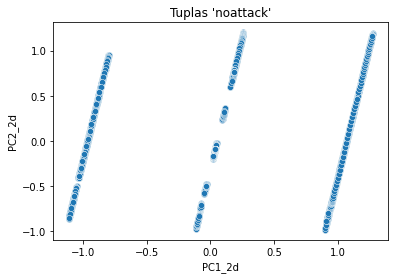

In [6]:
sns.scatterplot(data=tuples_2d_noattack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'noattack'")

### Linear Regression

In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

X = tuples_2d_noattack.PC1_2d.values.reshape(-1, 1)
y = tuples_2d_noattack.PC2_2d.values.reshape(-1, 1)

In [8]:
# Train the model using the training sets
regr.fit(X, y)

LinearRegression()

In [9]:
# Make predictions using the testing set
y_pred = regr.predict(X)

In [10]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficients: 
 [[4.54685404e-18]]
Mean squared error: 0.18
Coefficient of determination: 0.00


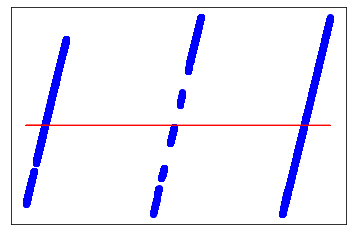

In [11]:
# Plot outputs
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="red", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

### Interpolacion

In [12]:
# Create a linear interpolation function based on the original data
linear_interpolation_func = scipy.interpolate.interp1d(tuples_2d_noattack.PC1_2d, tuples_2d_noattack.PC2_2d, kind='linear')

In [13]:
pc1_max = np.max(tuples_2d_noattack.PC1_2d.values)
pc1_min = np.min(tuples_2d_noattack.PC1_2d.values)
print("MAX PC1_2D:", pc1_max)
print("MIN PC1_2D:", pc1_min)

MAX PC1_2D: 1.2746436578420894
MIN PC1_2D: -1.1123535175085475


In [14]:
in_between_scale = np.linspace(pc1_min, pc1_max, 100)

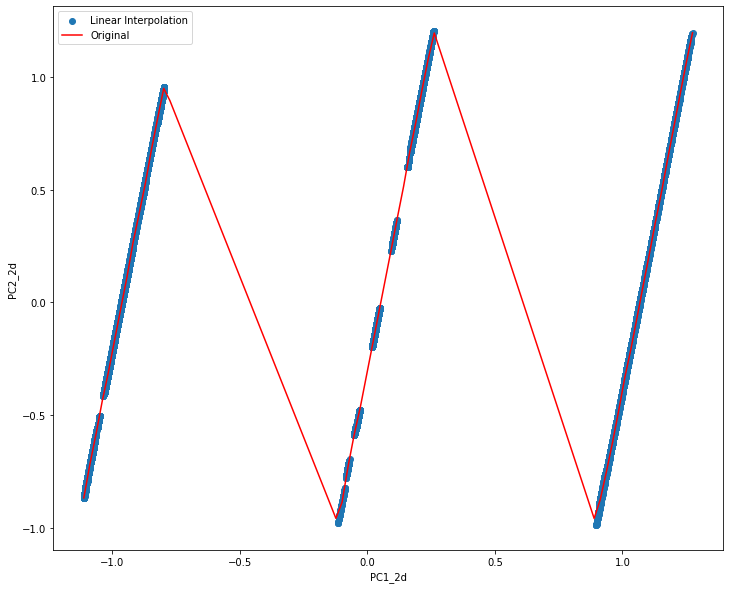

In [15]:
linear_interpolated_y = linear_interpolation_func(in_between_scale)

# Plot the result
plt.figure(figsize=(12,10))
plt.scatter(tuples_2d_noattack.PC1_2d, tuples_2d_noattack.PC2_2d)
plt.plot(in_between_scale, linear_interpolated_y, 'red')
plt.legend(['Linear Interpolation', 'Original'])
plt.xlabel('PC1_2d')
plt.ylabel('PC2_2d')
plt.show()

In [16]:
# Ahora me invento un punto (0.25, -0.5)
invent_y = linear_interpolation_func(0.25)
print("Para x = 0.25, y =", invent_y)

Para x = 0.25, y = 1.1512686505683942


In [17]:
distancia_punto_interpolacion = abs(-0.5 - invent_y)
print("Pero el punto era (0.25, -0.5)")
print("Distancia punto-a-interpolacion", distancia_punto_interpolacion)

Pero el punto era (0.25, -0.5)
Distancia punto-a-interpolacion 1.6512686505683942


In [18]:
distancias_punto_interpolacion = []
for punto in tuples_2d_noattack.values:
    x = punto[0]
    y = punto[1]
    pred_y = linear_interpolation_func(x)
    distancia = abs(y-pred_y)
    distancias_punto_interpolacion.append(distancia)

In [19]:
print("DISTACIA MAX:", np.max(distancias_punto_interpolacion))
print("DISTACIA MIN:", np.min(distancias_punto_interpolacion))
print("DISTACIA AVG:", np.average(distancias_punto_interpolacion))
print("DISTACIA STD:", np.std(distancias_punto_interpolacion))
print("DISTACIA VAR:", np.var(distancias_punto_interpolacion))

DISTACIA MAX: 0.0
DISTACIA MIN: 0.0
DISTACIA AVG: 0.0
DISTACIA STD: 0.0
DISTACIA VAR: 0.0


### Pruebas interpolacion sobre estados atacados

In [20]:
tuples_attack = pd.read_csv("../mountaincar_attack.csv")

In [21]:
tuples_attack.head()

,state_0,state_1,action,next_state_0,next_state_1,reward
0,-0.499143,0.050000,2.0,-0.547951,0.001191,-1.0
1,-0.547951,0.001191,1.0,-0.496577,0.051374,-1.0
2,-0.496577,0.051374,2.0,-0.494031,0.052546,-1.0
3,-0.494031,0.052546,2.0,-0.540332,0.003699,-1.0
4,-0.540332,0.003699,1.0,-0.486507,0.053825,-1.0


In [22]:
tuples_2d_attack = pd.DataFrame(pca_2d.transform(tuples_attack))
tuples_2d_attack.columns = ["PC1_2d", "PC2_2d"]
tuples_2d_attack.head()

,PC1_2d,PC2_2d
0,1.021403,-0.263741
1,0.038089,-0.091941
2,1.029988,-0.224180
3,1.023075,-0.254846
4,0.040354,-0.079590


[Text(0.5, 1.0, "Tuplas 'attacked'")]

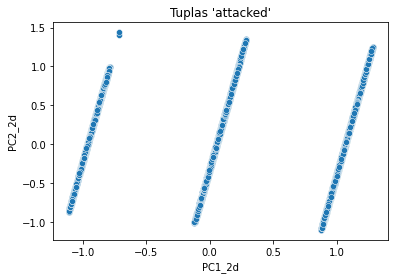

In [23]:
sns.scatterplot(data=tuples_2d_attack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'attacked'")

In [24]:
estados_atacados = []
for punto in tuples_2d_attack.values:
    distancia = math.inf
    anomalo = False
    x = punto[0]
    y = punto[1]
    
    try:
        pred_y = linear_interpolation_func(x)
        distancia = abs(y-pred_y)
        if distancia > 0.01:
            anomalo = True
    except ValueError:
        anomalo = True
    
    estados_atacados.append([x,y,distancia,anomalo])
estados_atacados_df = pd.DataFrame(data=estados_atacados, columns=["PC1_2d", "PC2_2d", "distancia", "anomalo"])

In [25]:
estados_atacados_df.head()

,PC1_2d,PC2_2d,distancia,anomalo
0,1.021403,-0.263741,0.007294,False
1,0.038089,-0.091941,0.009999,False
2,1.029988,-0.224180,0.002455,False
3,1.023075,-0.254846,0.004889,False
4,0.040354,-0.079590,0.009650,False


In [26]:
estados_atacados_df['anomalo'].value_counts()

False    173083
True     115526
Name: anomalo, dtype: int64

[Text(0.5, 1.0, "Estados anomalos de 'mountaincar_attack'")]

/home/cxb0439/Documentos/GitHub/openai-gym-dqn/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


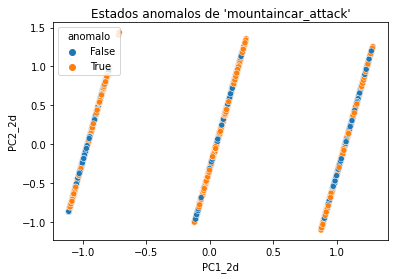

In [27]:
sns.scatterplot(data=estados_atacados_df, x='PC1_2d', y='PC2_2d', hue='anomalo').set(title="Estados anomalos de 'mountaincar_attack'")